In [4]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt
from multiprocessing import Pool

import os
import time
import sys

In [5]:
def simMotif_wrap(numberOfMotif):
    def simMotif(tmp):
        motifs = [0]*numberOfMotif
        album = dict()
        k = 0
        while len(album) < numberOfMotif:
            motifNumber = np.random.randint(numberOfMotif)
            motifs[motifNumber] += 1
            if motifs[motifNumber] >= 2:
                album[motifNumber] = 1
            k += 1
        return np.array(motifs)
    return simMotif

In [6]:
def freqDis(data):
    freq = dict()
    for d in data:
        freq[d] = freq.get(d, 0) + 1
    return freq

In [7]:
def combine(freqs):
    totalFreq = dict()
    for freq in freqs:
        for k in freq.keys():
            totalFreq[k] = totalFreq.get(k, 0) + freq[k]
    return totalFreq

In [8]:
def maxFreq(totalFreq):
    keys = freq.keys()
    key = keys[0]
    maxSoFar = totalFreq[keys[0]]
    for k in keys:
        val = totalFreq[k]
        if val > maxSoFar:
            key = k
            maxSoFar = val
    return key

In [ ]:
numberOfMotif = 721
numberOfSim = 10000
simMotif = simMotif_wrap(numberOfMotif)

In [ ]:
start_time = time.time()
p = Pool(4)
datas = p.map(simMotif, range(numberOfSim))
freqs = p.map(freqDis, datas)
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
totalFreq = combine(freqs)

In [ ]:
xs = totalFreq.keys()
ys = [ totalFreq[x]/numberOfSim for x in xs ]
maxx = maxFreq(totalFreq)
mean = np.mean(ys)
plt.figure(figsize=(10,10))
plt.plot(xs, ys, lw = 2, c = 'crimson', label = "Number of Motif: " + str(numberOfMotif))
plt.axvline(maxx, c='c', ls = '--', lw = 2, label = "Peak At: " + str(maxx))
plt.legend()
plt.savefig("Number of Motif: " + str(numberOfMotif) + " and " + "Peak At: " + str(maxx))

In [78]:
numberOfMotifs = np.linspace(10, 2000, 100)#[50 * i for i in xrange(1, 100)]
numberOfSim = 5000


In [79]:
start_time = time.time()
def wrap(numberOfMotif):
    numberOfMotif = int(numberOfMotif)
    print numberOfMotif
    simMotif = simMotif_wrap(numberOfMotif)
    datas = [sum(simMotif(i)) for i in xrange(numberOfSim)]
    return np.mean(datas)

p = Pool(3)
means = p.map(wrap, numberOfMotifs) 
print("--- %s seconds ---" % (time.time() - start_time))

371
190
10
30
50
70
90
211
110
130
231
391
150
170
251
552
412
271
291
432
572
311
452
331
592
351
472
733
613
492
512
753
633
532
653
773
914
673
793
934
693
814
713
954
834
1095
974
854
1115
994
874
894
1135
1015
1276
1035
1155
1055
1296
1175
1075
1316
1195
1457
1216
1336
1477
1236
1356
1256
1497
1376
1638
1517
1396
1658
1537
1417
1437
1678
1557
1819
1577
1698
1597
1839
1718
1618
1859
1738
2000
1758
1879
1778
1899
1798
1919
1939
1959
1979
--- 1342.65510392 seconds ---


In [103]:
# means

In [81]:
# ys = means

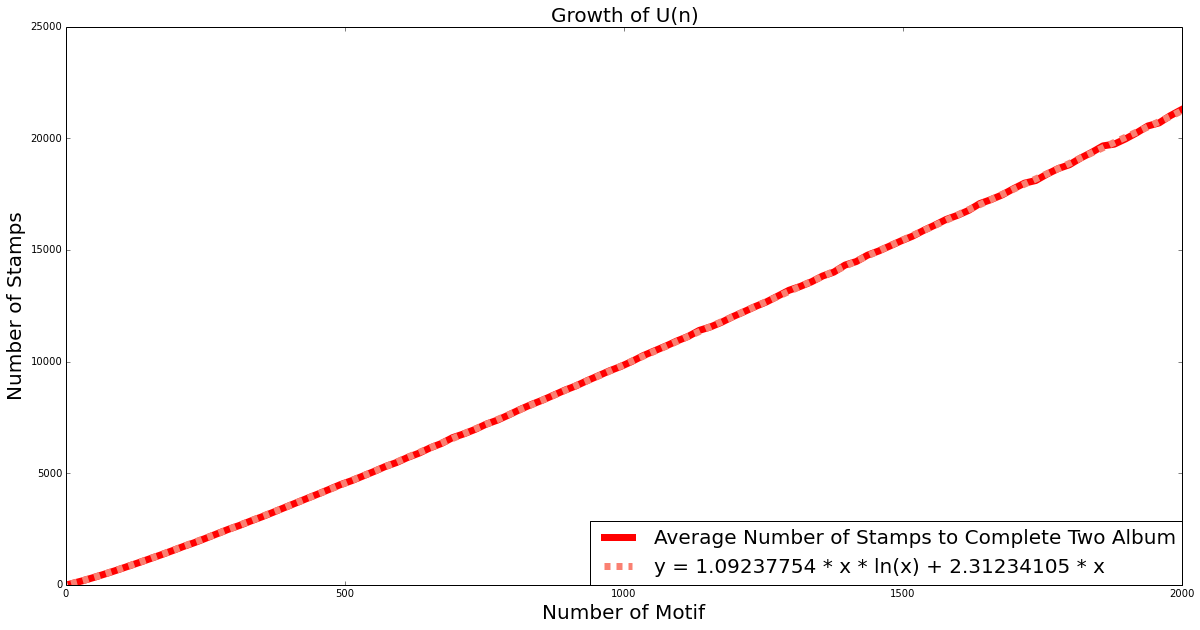

In [160]:
plt.figure(figsize=(20,10))
plt.plot(numberOfMotifs, means, lw = 7, color ='r', label = "Average Number of Stamps to Complete Two Album")
plt.plot(numberOfMotifs, guesses, lw = 7, color='salmon', ls = '--', label = "y = 1.09237754 * x * ln(x) + 2.31234105 * x")
plt.legend(bbox_to_anchor=(0.47, 0., 1., .102), loc=3,
           ncol=1, borderaxespad=0., fontsize=20)
plt.ylabel("Number of Stamps", fontsize=20)
plt.xlabel("Number of Motif", fontsize=20)
plt.title("Growth of U(n)", fontsize=20)
plt.savefig("Growth of U(n)_v3")

Optimization terminated successfully.
         Current function value: 66493.482046
         Iterations: 176
         Function evaluations: 325
[-0.6735875   2.31234105  1.09237754]


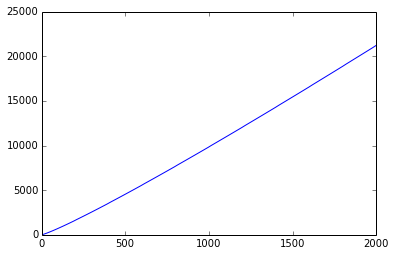

In [148]:
toInt = lambda xs: np.array([int(x) for x in xs])
def padAll(xs):
    tmp = np.zeros((xs.size, 3))
    for i in xrange(xs.size):
        tmp[i, 0] = 1.
        tmp[i, 1] = xs[i]
        tmp[i, 2] = xs[i] * np.log(xs[i])
    return tmp

def cost(ws):
    tmp = 0
    for i in xrange(numberOfMotifs.size):
        guess = (ws[0] * pxs[i][0]) + (ws[1] * pxs[i][1]) + (ws[2] * pxs[i][2])
        tmp += (means[i] - guess)**2
    return tmp

pxs = padAll(toInt(numberOfMotifs))
import scipy.optimize as opt
res = opt.fmin(cost, [0.,1.,0.])  
print res
guesses = np.dot(pxs, res)
plt.plot(numberOfMotifs, guesses)

In [143]:
guesses[-1], means[-1]

(6808.763581688564, 21288.800999999999)